<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-бибилиотек-и-загрузка-данных" data-toc-modified-id="Импорт-бибилиотек-и-загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт бибилиотек и загрузка данных</a></span></li><li><span><a href="#Удаление-подписей" data-toc-modified-id="Удаление-подписей-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Удаление подписей</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Векторизация-текста" data-toc-modified-id="Векторизация-текста-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Векторизация текста</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Простейшая-модель" data-toc-modified-id="Простейшая-модель-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Простейшая модель</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Модель-Байеса" data-toc-modified-id="Модель-Байеса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель Байеса</a></span></li><li><span><a href="#BERT" data-toc-modified-id="BERT-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>BERT</a></span><ul class="toc-item"><li><span><a href="#Векторизация-текстов" data-toc-modified-id="Векторизация-текстов-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Векторизация текстов</a></span></li><li><span><a href="#Построение-эмбеддингов" data-toc-modified-id="Построение-эмбеддингов-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Построение эмбеддингов</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Импорт бибилиотек и загрузка данных

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import gc

from scipy.sparse import lil_matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

import nltk

import transformers
import torch

In [2]:
try:
    data = pd.read_csv("/datasets/toxic_comments.csv")
except FileNotFoundError:
    data = pd.read_csv("toxic_comments.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [4]:
with pd.option_context("display.max_colwidth", None):
    display(data["text"].head(10))

0                                                                                                                                                                                                                                                                                                                                                                             Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                                                                                               

Данные успешно загружены, можно приступать к обработке.

Тексты довольно грязные и в них есть лишние (служебные) данные - [подписи](https://en.wikipedia.org/wiki/Wikipedia:Signatures) авторов, т.е. IP, таймпстампы и пр. Их уберем регексами.

Также уберем ссылки: они не являются обычным языком, соответственно, включать их в модель не стоит.

### Удаление подписей

In [5]:
regexes = [
    r"(\d{1,3}\.){3}\d{1,3}",  ## IP адрес
    r"(\d{2}:\d{2}), (January|February|March|April|May|June|July|August|September|October|November|December) (\d{1,2}, \d{4} \(UTC\))",  ## Таймстамп
    r"https*://\S*" ## Ссылки
]

In [6]:
## На всякий случай конвертнем в Unicode
data["text"] = data["text"].astype("U")

In [7]:
for item in regexes:
    regex = re.compile(item)
    data["text"] = data["text"].str.replace(regex, "")

In [8]:
with pd.option_context("display.max_colwidth", None):
    print(data["text"].head(10))

0                                                                                                                                                                                                                                                                                                                                                                                         Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.
1                                                                                                                                                                                                                                                                                                                                                                               

Данные немного почистили, можно приступать к лемматизации.

### Лемматизация

Весь текст у нас на английском, так что для лемматизации будем пользоваться библиотекой NLTK.

Напишем функцию, которая будет лемматизировать и разделять исходный текст.

In [9]:
def split_and_lemm(text:str, lemmatizer) -> str:
    
    def match_tags(tag) -> str:
        ## Сопоставляет теги, возвращаемые nltk.pos_tag с аргументами .lemmatize()
        
        adj_list = ["JJ", "JJR", "JJS"]
        verb_list = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
        adverb_list = ["RB", "RBR", "RBS"]
        
        if tag in adj_list:
            return "a"
        elif tag in verb_list:
            return "v"
        elif tag in adverb_list:
            return "r"
        else:
            return "n"
    
    
    text = nltk.pos_tag(nltk.word_tokenize(text))
    result = []
    for item in text:
        word = item[0].lower() ## слова, начинающиеся с заглавных, не лемматизируются, поэтому .lower()
        pos_tag = match_tags(item[1])
        result.append(lemmatizer.lemmatize(word, pos=pos_tag))
        
    return " ".join(result)

Функция готова, теперь проверим ее на каком-нибудь контрольном тексте.

In [10]:
test_text = "The Wheel of Time turns, and ages come and pass, leaving memories that become legend. Legends fade to myth, and even myth is long forgotten when the Age that gave it birth comes again.\n In one Age, called the third age by some, an Age yet to come, an age long pass, a wind rose in the Mountains of Mist. The wind was not the beginning. There are neither beginnings or endings to the turning of the Wheel of Time. But it was a beginning."

Функции NLTK завязаны на некоторые пакеты, поэтому загрузим их.

In [11]:
nltk.download(["wordnet", "punkt", "averaged_perceptron_tagger"])

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/metal_undivided/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/metal_undivided/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/metal_undivided/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

In [13]:
print("Original text:\n", test_text, "\n")
print("Lemmatized text:\n", split_and_lemm(test_text, lemmatizer))

Original text:
 The Wheel of Time turns, and ages come and pass, leaving memories that become legend. Legends fade to myth, and even myth is long forgotten when the Age that gave it birth comes again.
 In one Age, called the third age by some, an Age yet to come, an age long pass, a wind rose in the Mountains of Mist. The wind was not the beginning. There are neither beginnings or endings to the turning of the Wheel of Time. But it was a beginning. 

Lemmatized text:
 the wheel of time turn , and age come and pas , leave memory that become legend . legends fade to myth , and even myth be long forget when the age that give it birth come again . in one age , call the third age by some , an age yet to come , an age long pas , a wind rise in the mountain of mist . the wind be not the beginning . there be neither beginning or ending to the turning of the wheel of time . but it be a beginning .


Вроде выглядит достойно, можно пробовать применять ко всему корпусу.

In [14]:
%%time
corpus = data["text"].apply(lambda item: split_and_lemm(item, lemmatizer))

CPU times: user 10min 28s, sys: 2.45 s, total: 10min 31s
Wall time: 10min 32s


In [15]:
with pd.option_context("display.max_colwidth", None):
    print(corpus.head(10))

0                                                                                                                                                                                                                                                                                                                                                                                 explanation why the edits make under my username hardcore metallica fan be revert ? they be n't vandalisms , just closure on some gas after i vote at new york doll fac . and please do n't remove the template from the talk page since i 'm retired now .
1                                                                                                                                                                                                                                                                                                                                                                                         

Функция работает весьма медленно, но корпус вроде похож на правду.

Теперь можно делить данные на обучающую и тестовую выборки и векторизовывать текст.

### Баланс классов

Прежде чем делить данные на выборки, посмотрим, как распределены классы в целевом признаке.

In [16]:
print("Доля токсичных комментариев в корпусе: {0:.2%}".format(data["toxic"].sum() / data.shape[0]))

Доля токсичных комментариев в корпусе: 10.16%


Есть сильный дисбаланс классов в целевом признаке, будем это учитывать при обучении моделей.

### Разделение на выборки

Разделим данные на обучающую и тестовую выборки, в пропорции 80/20. Подбор гиперпараметров будем осуществлять кросс-валидацией.

Предиктором у нас выступит сам векторизованный текст, целевым признаком - флаг токсичности.

In [17]:
seed = 111  ## для воспроизводимости результатов

In [18]:
features_train, features_test, target_train, target_test = train_test_split(corpus, data["toxic"],
                                                                            train_size=.8, random_state=seed)

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(127433,)
(127433,)
(31859,)
(31859,)


Данные разделили, теперь можно векторизовывать обучающую выборку.

### Векторизация текста

Векторизовывать будем через TF-IDF, это позволит присвоить больший вес менее часто встречаемым словам, которые нам и интересны.

Поскольку поиск гиперпараметров будет при помощи кросс-валидации, фит векторизатора запакуем в пайплайн и будем применять его в итерациях GridSearchCV, иначе получется утечка данных в валидационные части выборки.

In [19]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/metal_undivided/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stop_words = nltk.corpus.stopwords.words("english")

In [21]:
#vectorizer = TfidfVectorizer(stop_words=stop_words)

In [22]:
#features_train = vectorizer.fit_transform(features_train)

Векторы получены, можно пробовать обучать модели.

## Обучение

### Простейшая модель

Прежде чем обучать модели, стоит понять, какой скор можно считать адекватным.

Для этого обучим простую модель, которая предсказывает самое распространненое значение (в нашем случае все комментарии нетоксичные).

In [23]:
dummy_model = GridSearchCV(
    DummyClassifier(),
    param_grid={},
    scoring="f1"
)

In [24]:
dummy_model.fit(features_train, target_train)

GridSearchCV(estimator=DummyClassifier(), param_grid={}, scoring='f1')

In [25]:
dummy_model.best_score_

0.0

Ну в принципе, все математично и логично.

### Логистическая регрессия

Начнем с самой простой модели - логистической регрессии.

In [46]:
linear_params = {
    "model__class_weight":["balanced"],
    "model__max_iter":[200],
    "model__random_state":[seed]
}

linear_pipeline = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 3), stop_words=stop_words)),
    ("model", LogisticRegression())
])

linear_model = GridSearchCV(
    linear_pipeline,
    param_grid=linear_params,
    scoring="f1",
    #verbose=3
)

In [ ]:
%%time
linear_model.fit(features_train, target_train)

/home/metal_undivided/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/metal_undivided/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [28]:
linear_model.best_score_

0.7408291760624209

Точность немного не дотягивает до условия задания, нужно искать еще варианты.

Деревья решений здесь подойдут слабо - слишком много признаков.

То же самое и с kNN - слишком много данных, как признаков, так и наблюдений.

Еще будем вести сводную таблицу.

In [29]:
model_summary = pd.DataFrame(
    {"accuracy":linear_model.best_score_},
    index=["Logistic Regression"]
)

### Модель Байеса

Попробуем Байесовы модели, судя по описанию, они должны хорошо подходить под данную задачу.

В sklearn их несколько, в описании ComplementNB написано, что он хорошо справляется с несбалансированными данными, что мне и нужно.

Гауссова Байеса я попробовал обучить, но у меня на него не хватает памяти.

In [42]:
bayes_grid = {
    #"model__alpha":np.arange(2, .1, -.1)
}

bayes_pipeline = Pipeline([
    ("vect", CountVectorizer(ngram_range=(1, 3), stop_words=stop_words)),
    ("model", ComplementNB())
])

bayes_model = GridSearchCV(
    bayes_pipeline,
    param_grid=bayes_grid,
    scoring="f1"
)

In [43]:
%%time
bayes_model.fit(features_train, target_train, model__sample_weight=np.where(target_train == 1, 9, 1))

CPU times: user 3min 33s, sys: 25.5 s, total: 3min 59s
Wall time: 3min 59s


GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(ngram_range=(1, 3),
                                                        stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('model', ComplementNB())]),
             param_grid={}, scoring='f1')

In [44]:
bayes_model.best_score_

0.6679574745219097

In [45]:
bayes_model.best_estimator_

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 3),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('model', ComplementNB())])

Скор хуже, чем у линейной регрессии, попробуем еще другие модели.

In [33]:
model_summary = pd.concat([model_summary] + 
    [pd.DataFrame(
        {"accuracy":bayes_model.best_score_},
        index=["Complement Bayes"]
    )]
)

### BERT

<div style="background: #91ff7e; padding: 5px; border: 1px solid Black; border-radius: 5px;">
    КОММЕНТАРИЙ СТУДЕНТА
    <br/>
    Я не знаю, где на сервере есть предобученная модель (и есть ли она вовсе), поэтому у себя я ее распаковал в <i><b>./bert/</b></i><br>
    Модель использовал из ссылки в следующей ячейке, если на сервере она есть, то прошу указать путь к ней, и я перепишу код, чтобы работало и на сервере. <br>
    Если проект проверятеся локально, то могу только предложить распаковать модель с тем же относительным путем.
</div>

Использовать будем предобученную Google базовую 12-слойную [модель](https://storage.googleapis.com/bert_models/2018_10_18/cased_L-12_H-768_A-12.zip).

Сначала подготовим данные: закодируем их собственным энкодером BERT и добавим паддинг, чтобы привести все закодированные тексты к одной размерности.

#### Векторизация текстов

In [ ]:
## на моей машине ячейка при первой попытке исполнения выдает ошибку, а дальше ок
#tokenizer = transformers.BertTokenizer(vocab_file="./bert/vocab.txt")

Векторизуем тексты

Случайно выберем 20000 точек из обучающей выборки, т.к. на всех 150К+ данных строить эмбеддинги долго, да и памяти не хватит.

In [36]:
%%time
#bert_encoded = data["text"][features_train.sample(20000, random_state=seed).index].apply(
#    lambda item: tokenizer.encode(item, add_special_tokens=True)
#)

CPU times: user 32.8 s, sys: 48 µs, total: 32.8 s
Wall time: 32.8 s


Тексты векторизованы, теперь нужно добавить паддинг

In [37]:
#max_length = bert_encoded.str.len().max()

#bert_encoded = np.array(
#    bert_encoded.apply(
#        lambda item: item + [0] * (max_length - len(item))
#    ).to_list()
#)

Еще понадобится маска внимания

In [38]:
#attention_mask = np.where(bert_encoded != 0, 1, 0)

#### Построение эмбеддингов

Обучающие данные подготовлены, можно строить эмбеддинги.

<div style="background: #91ff7e; padding: 5px; border: 1px solid Black; border-radius: 5px;">
    КОММЕНТАРИЙ СТУДЕНТА
    <br/>
    В общем, так и не удалось мне заставить BERT работать, еще нужно с зависимостями разбираться. <br>
    Потом доведу до ума, уже довольно много времени на него потрачено.
</div>

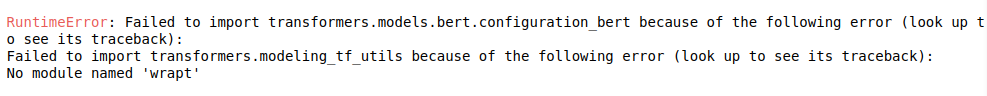

In [40]:
#config = transformers.BertConfig.from_json_file("./bert/bert_config.json")

RuntimeError: Failed to import transformers.models.bert.configuration_bert because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
No module named 'wrapt'

In [ ]:
#model = transformers.BertModel.from_pretrained("./bert/bert_model/bert_model/bert_model.ckpt.index", config=config, from_tf=True)

## Тестирование

Наилучшую точность показала модель Байеса, ее и проверим на тестовой выборке.

In [41]:
model_summary

,accuracy
Logistic Regression,0.740829
Complement Bayes,0.934789


In [53]:
best_model = bayes_model.best_estimator_

test_predictions = best_model.predict(features_test)

print("F1 на тестовой выборке: {0:.4f}".format(f1_score(target_test, test_predictions)))

F1 на тестовой выборке: 0.6026


In [50]:
best_model

Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('model', ComplementNB())])

## Выводы

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны